# Exemplar: Explore sampling

## Introduction
In this activity, I will perform effective sampling of a dataset in order to make it easier to analyze. As a data professional we will often work with extremely large datasets, and utilizing proper sampling techniques helps us improve efficiency.

For this activity, I work as an analytics team member for the Environmental Protection Agency. I analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report the findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. I will use effective sampling within this dataset. 

## Step 1: Imports

In [4]:
# Import libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [5]:
# Load data

epa_data = pd.read_csv("C:/2_PERSONAL/Data Science/Google Advanced Data Analytics/Course4_The Power of Statistics/New folder (2)/6. New folder (2)/c4_epa_air_quality.csv", index_col = 0)

## Step 2: Data exploration

### Examine the data

In [6]:
# First 10 rows of the data
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


Note: The `aqi` column represents the Air Quality Index.

In [12]:
# check the shape of data
epa_data.shape

(260, 9)

### Generate a table of descriptive statistics

In [11]:
#Generate a table of descriptive statistics.
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


The mean value of the `aqi` column is `6.757692`. This value will be compared to the mean value after sampling with replacement later in the notebook.

In [13]:
# Use the mean() function on the aqi column to check whther the above value is same
population_mean = epa_data['aqi'].mean()
population_mean

6.757692307692308

Note: Both mean values are same.

## Step 3: Statistical tests

### Draw 50 samples with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number (Ex: 42) for random seed. 

In [14]:
# draw 50 samples
# When we use an integer for random_state, the function will produce the same results across different execution

sampled_data = epa_data.sample(n=50, replace=True, random_state=42)

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [15]:
# check the sample
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


Note: In the DataFrame output row index 102 repeated twice. Because sampling with replacement is random, allowing sampling units to occur more than once. Row index 102 just happened to be sampled more than once. 

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [16]:
### calculate sample mean

sample_mean = sampled_data['aqi'].mean()
sample_mean

5.54

 `sample_mean` different from `population_mean`due to sampling variability. In this case, the sample mean is a point estimate of the population mean based on one random sample of 50 AQI values rather than the 260 AQI values from the original population in `epa_data`.  

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times (10,000 samples of sample size 50) and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Here `random_state` is not set to a value since we need different samples.
* list `append()` function is used to add the value of the sample `mean` to each item in the list.


In [19]:
# create empty list
estimate_list = []

# add 10,000 point estimates (smaple means) to the list
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50,replace=True).mean())

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [22]:
# create dataframe with column 'estimate' using the list

estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,6.10
1,6.64
2,6.22
3,9.18
4,7.02
...,...
9995,6.26
9996,7.62
9997,5.26
9998,5.90


### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [23]:
### Compute the mean() of the sampling distribution

mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

6.768514

Note: The mean for the sampling distribution of 10,000 random samples will vary as `random_state` was not set to a value. However, According to the central limit theorem, the mean of the preceding sampling distribution should be roughly equal to the population mean. 

Random sampling with replacement is related to the central limit theorem because it means you are drawing observations **independently** from a population. 'The central limit theorem states that if a sample size is large enough and the observations are drawn independently—or with replacement—the sampling distribution of the sample mean is approximately the normal distribution. Furthermore, the mean parameter is the population mean and the variance parameter is the standard error. 
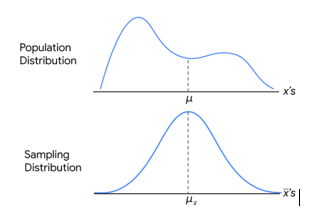                    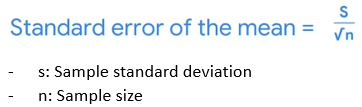

### Output the distribution using a histogram

<Axes: >

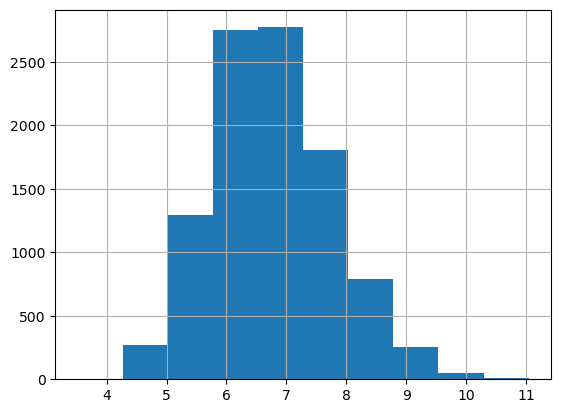

In [24]:
### Output the distribution of these point estimates using a histogram

estimate_df['estimate'].hist()

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [26]:
### Calculate the standard error

standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

0.7413225908290327

## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution. The following code overlays the density curve of the normal distribution described in the theorem on top of the histogram of the sampling distribution obtained by repeated sampling. The solid magenta line in the graph is the population mean, the blue dotted line is the mean of the 10,000 sample means, and the red dashed line is the mean of the first random sample of 50.

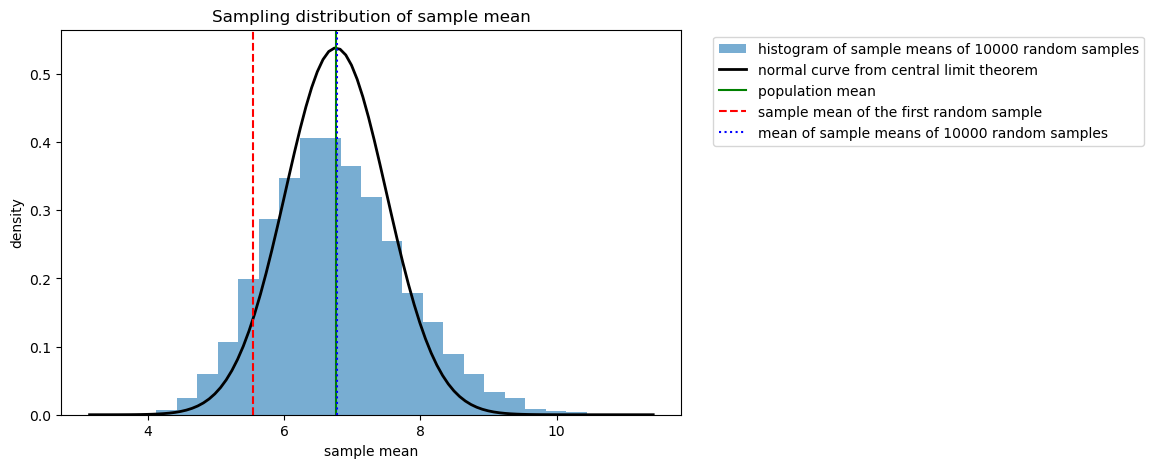

In [43]:
# plot the histogram of poitnt estimates
''' density parameter in a histogram is a boolean value that determines whether the histogram should be normalized to 
form a probability density function. A probability density function is a function that describes the relative likelihood
of a continuous random variable taking a certain value. The area under the curve of a probability density function is 
always equal to 1. Alpha defines the transparency.
'''
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density = True, alpha=0.6, label = "histogram of sample means of 10000 random samples")

xmin, xmax = plt.xlim()
# generate a grid of 100 values from xmin to xmax.
x = np.linspace(xmin, xmax, 100)

# probability density function of given population mean and standard error
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')

# plot population mean
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')

# plot sample mean of first random sample
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')

# mean of sample means of 10000 random samples
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')

plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

**Note:** 
1.  The histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
2.  The estimate based on one particular sample (red dashed line) is off-center. This is expected due to sampling variability. The red dashed line would be in a different location if `epa_data.sample(n=50, replace=True, random_state=42)` had a different value for `random_state`.
3.  The population mean (green solid line) and the mean of the sample means (blue dotted line) overlap, meaning that they are essentially equal to each other.

# Considerations

- Sampling with replacement on a dataset leads to duplicate rows.
- Sample means are different from population means due to sampling variability.
- The central limit theorem helps describe the sampling distribution of the sample mean for many different types of datasets.


**Findings**
- The mean AQI in a sample of 50 observations was below 100 in a statistically significant sense (at least 2–3 standard errors away). For reference, AQI values at or below 100 are generally thought of as satisfactory.
- This notebook didn't examine values outside the "satisfactory" range so analysis should be done to investigate unhealthy AQI values.

**What should be conveyed to external stakeholders?**
- Carbon monoxide levels are satisfactory in general.  
- Funding should be allocated to further investigate regions with unhealthy levels of carbon monoxide and improve the conditions in those regions.

